참고 책 : Generative Deep Learning 미술관에 GAN 딥러닝 실전 프로젝트 - 출판사 : 한빛미디어

# 생성 딥러닝

생성 모델링(Generative Modeling)과 판별 모델링(Discriminative Modeling)은 다르다.

생성 모델링 : 확률 모델의 관점으로 보면 데이터셋을 생성하는 방법을 기술한 것
- 모델에서 샘플링 -> 새로운 데이터 생성할 수 있음

생성하려는 개체의 샘플을 많이 가진 데이터셋(훈련 데이터, training data) 필요

데이터 포인트 하나 : 샘플(sample)

샘플의 한 픽셀

훈련 데이터 -> 샘플 여러개 -> 픽셀로 이루어진 그림

각 샘플은 많은 특성(feature)로 이루어져있다.

이미지 생성 문제일 경우 특성 : 개별 픽셀값

생성 모델링의 목표 : 일련의 새로운 특성을 생성할 수 있는 모델을 만드는 것

원본 데이터와 동일한 규칙으로 생성된 것처럼 보이는 특성을 만듦

즉, 원본 데이터와 비슷한 이미지를 ㅁ나들어냄

생성 모델은 결정적(dterministic) X, 확률적(probabilistic)O이어야 한다.

모델이 데이터셋에 있는 모든 픽셀의 평균값을 구하는 것처럼 고정된 계산만 하게 되면 매번 동일한 값을 출력. -> 생성 모델이 아니다.

생성 모델은 생성되는 개별 샘플에 영향을 미칠 수 있는 확률적(랜덤한) 요소를 포함해야만 한다!

훈련 데이터셋의 분포에 가깝게 샘플링하여 원본 훈련 세트(training set)에 있을 것 같은 새롭고 완전히 다른 샘플을 생성한다.

샘플을 관측(observation)이라고도 한다.

생성 모델링과 반대되는 개념 : 판별 모델링

개념적인 **생성 모델링**과 판별 모델링의 차이

**생성 모델링**
- 비지도학습
- 하지만 개별 클래스의 샘플을 생성하는 방법을 학습하기 위해 지도학습에 적용될 수도 있다.

판별 모델링(discriminative modeling)
- 지도학습
- ex) 이진 분류 : 반고흐 그림(1), 다른 그림(0)
- label된 데이터셋을 사용해 입력, 출력을 mapping 하는 함수를 학습한다.라고도 함.



수학적인 **생성 모델링**과 판별 모델링의 차이

**생성 모델링**
- 샘플이 관측될 확률 `p(x)` 을 추정
- +) 지도학습에 이용될 땐? label y가 주어져있는 조건부 확률 `p(x|y)`을 추정 ( 그래도 샘플 x에 대한 확률을 추정하는 것은 동일)
- 목적 : 훈련 데이터셋에 속할 가능성이 높은 픽셀을 출력하는 것(원본 이미지와 가장 닮은 가짜 이미지를 출력하는 것)

판별 모델링
- 샘플 `x`가 주어졌을 때 label `y`의 확률 `p(y|x)`를 추정
- 목적 : label `y`를 판별하는 것!
- 샘플 x가 범주 `y`에 속할 확률을 추정

판별 모델링 -> 기존 이미지에 대한 확률을 출력

우리는 원본 훈련 데이터셋에 속할 가능성이 높은 픽셀을 출력하는 생성 모델을 훈련

판별 모델링
- 기준 : 얼마나 label을 잘 맞췄는 가 -> 오차로 평가하면 되니까 평가하기 쉽다

**생성 모델링**
- 기준 : 그림의 품질을 주관적으로 사람이 평가 -> 평가하기 어렵다

생성 모델링 프레임워크
- 샘플 데이터셋 : X
- 알려지지 않은 샘플의 분포 : P_data
- 생성 모델 : P_model
- P_model이 P_data를 흉내낸다.
  - 규칙 1. P_data에서 뽑은 것같은 샘플 생성
  - 규칙 2. X에 있는 샘플과 다른 샘플 생성

P_model은 P_data에서 뽑은 것 같은 샘플을 만든다.

필요한 확률 개념
1. 표본 공간 : 샘플 x가 가질 수 있는 모든 값의 집합
2. 확률 밀도 함수 : p(x)
3. 모수 모델 : p_theta(x) : 한정된 개수의 파라미터 세타를 사용하여 묘사하는 확률 밀도 함수의 한 종류
- 즉, 파라미터 세타들로 확률 밀도를 표현한 것
4. 가능도(likelihood) : 샘플 x가 주어졌을 때 세타의 알맞은 정도
- 즉, 포인트 x에서 세타로 정의된 확률 밀도 함수의 값
- 로그 가능도(log-likelihood)를 사용하는 경우가 많다.
5. 최대 가능도 추정 : 데이터셋X가 관측될 가능도(확률)을 최대화하는 파라미터 세타 헷의 최적값을 찾는 것

원래의 분포 P_data를 알지 못한다.

가지고 있는 것은 원래의 분포의 샘플뿐이다.

생성 모델의 목표는 이 샘플을 이용하여 원래의 분포에서 생성한 샘플을 완벽하게 흉내 내는 P_model을 만드는 것이다.

주어진 데이터를 기반으로 가능한 특성의 조합마다 확률 부여

표본 공간의 분포를 정의

이 분포에서 샘플링 가능 -> 이 목록 : 생성 모델이라고 하겠다.

문제점 발생 : 원본 데이터셋에 없는 조합은 표본 분포에서 확률이 0이 되므로 그에 해당되는 샘플은 생성할 수 없다.

문제 해결 -> 가능한 특성의 조합마다 가상의 등장횟수 1을 더한다.

가법 평활화(additive smoothing)이라고 한다.

이제 원본 데이터셋에 있지 않는 것을 포함하여 모든 개별 조합은 0이 아닌 샘플링 확률을 가진다.

또 다른 확률 분포 ; 나이브 베이즈(Naive Bayes) 모델

서로 영향을 미치지 않는 특성들에 대해 베이즈 가정을 한다.

영향을 미치지 않고 독립적이라고.

이렇게 해서 확률 밀도 함수를 조건부 확률의 곱으로 작성.

그게 바로 나이브 베이즈 모델.

각 특성에 대해 파라미터를 독립적으로 추정하는 문제로 축소되었다.

아까는 파라미터들끼리 독립적이지 않았음.

가능한 모든 조합에 대한 확률을 찾으면 된다.

이 모델은 원본 데이터셋에 등장하지 않지만 0이 아닌 확률을 할당할 수 있고, 그에 해당하는 데이터를 생성할 수 있다.

즉, 나이브 베이즈 모델은 데이터로부터 어떠한 구조를 학습 후, 원본 데이터셋에 없는 새로운 샘플을 생성할 수 있다.

나이즈 베이즈 모델의 문제점 발생

이미지의 크기가 32x32 라면 32x32=1024 개의 특성을 갖는다.

그리고 각 특성들은 0~255 즉, 256개의 값(픽셀) 중 1개의 값을 갖는다.

그런데 옷의 일부분에 해당되는 픽셀 -> 서로 의존성 강함

또한 각 픽셀당 256개의 픽셀값을 갖고, 한 이미지당 1024개의 특성을 갖는 고차원이다.

이렇게, 특성 간에 조건부 의존성이 매우 크고, 모델이 고차원 표본 공간을 갖는 다면 어떠한 생성 모델을 만들어야할까? -> 딥러닝 활용!

미리 만든 가정을 따르는 것 X

데이터로부터 의미 잇는 구조를 추론!

딥러닝이 저차원 공간의 특성으로 변환할 수 있다.

표현학습(representation learning) 이용.

표현학습?
- 고차원 표본 공간을 직접 모델링 X
- 저차원의 잠재공간(latent space)를 사용해 훈련 데이터셋의 각 샘플을 표현, 원본 공간의 포인트에 매핑(mapping)
- 즉, 잠재공간의 각 포인트는 어떤 고차원 이미지에 대한 표현이다.

ex) 다양한 모양의 원기둥 -> 너비, 높이 2가지의 특성으로 각 원기둥을 고유하게 표현 가능

이렇게 사람은 보고 특성을 바로 찾아냄

컴퓨터는?
- 높이, 너비가 원기둥 데이터셋을 가장 잘 묘사하는 2개의 잠재 공간 차원이라는 것을 알아낸다
- 매핑 함수를 학습 -> 공간의 한 포인트를 원기둥 이미지에 매핑해야 한다.
- 딥러닝은 다양한 방법으로 매핑 함수를 학습 가능

잠재 공간의 높이, 너비가 주어지면 매핑 함수를 따라가서 해당되는 원기둥 이미지를 그릴 수 있다.

이렇게 표현학습을 사용하면 이미지를 볼 때에도 픽셀값 하나하나를 기준으로 보는 것이 아닌 전체적인 특성.

ex) 머리가 길다, 짧다. 안경을 썼다, 안 썼다. 여자다, 남자다. 등등

이렇게 하게 되면 정확한 이미지를 찾지는 못하더라도 실제 모습과 충분히 가깝기 때문에 수백명의 사진들 중에서는 해당되는 사람을 찾을 수는 있다!



표현학습의 장점
- 샘플을 묘사하는 데 가장 뛰어난 특성을 찾고
- 그 특성을 원본 데이터에서 추출하는 방법을 학습한다.
- 즉, 픽셀들이 어떻게 출력되어야 하는 지를 가장 잘 설명하는 고수준 특성을 만든다.

즉, 표현학습의 잠재공간에는 특성들의 좌표? 같은 것들이 있어서 한 좌표를 찍으면 그에 대응되는 이미지를 만들어낼 수 있다는 것.

그 좌표가 조금만 움직이더라도 또 대응되는, 실제와 비슷한 이미지를 생성 가능하다는 것.

In [114]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
# 책 저장소 가져오기
!git clone https://github.com/rickiepark/GDL_code.git

fatal: destination path 'GDL_code' already exists and is not an empty directory.


In [116]:
# 가상환경 설정
# virtualenv, virtualenvwrapper 설치
!pip install virtualenv virtualenvwrapper

In [117]:
# 가상환경이 설치될 위치
!export WORKON_HOME=$HOME/.virtualenvs
# 가상환경을 만들 때 기본으로 사용할 파이썬 버전 설정
!export VIRTUALENVWRAPPER_PYTHON=/usr/local/bin/python3
# virtualenvwrapper 초기화 
!source /usr/local/bin/virtualenvwrapper.sh

In [118]:
!mkvirtualenv generative

/bin/bash: mkvirtualenv: command not found


In [119]:
import keras

In [120]:
# 앞서 만든 가상 환경을 활성화
!python -m ipykernel install --user --name generative

Installed kernelspec generative in /root/.local/share/jupyter/kernels/generative


# 딥러닝

정형 데이터(structured data)
- 특성을 열로 표현 가능

비정형 데이터(unstructured data)
- 특성을 열로 표현 가능 X
- ex) 이미지, 소리, 텍스트 (공간, 시간 구조가 존재)
- 비정형 데이터의 픽셀, 진동수, 문자 하나하나 -> 정보 X -> 모아야지 고수준 특성을 구성
- 데이터의 구성 요소가 고차원 공간에서 의존성을 가지고 연결되어있다. -> 픽셀, 문자를 독자적인 정보를 가진 특성으로 사용 X

따라서, 일반적인 로지스틱 회귀, 랜덤 포레스트, XGBoost 알고리즘을 원시 픽셀값에서 훈련시키게 되면 -> 성능이 매우 낮다. -> 공간 의존성이 없는 입력 특성을 기대하는 모델들이기 때문에 비정형 데이터에 알맞지 X

이러한 비정형 데이터 -> 딥러닝 활용!!

딥러닝

dense layer

fully-connected layer

여러 개의 층이 연결

1번째 층 -> 입력 이미지에서 모서리 같은 기본속성 감지 -> 더 강하게 활성화

2번째 층 -> 1번째 층의 출력이 입력값으로 됨 -> 좀 더 복잡한 특성 감지

... 이런식으로 네트워크 통과

최종 출력층 -> 입력이 n개의 범주에 속할 확률을 출력

네트워크를 훈련한다 : 정확한 예층을 만들기 위해 필요한 각 층의 가중치 조합을 찾는다.

배치 : 머신러닝에서의 배치 : 데이터셋 전체 or 데이터셋을 동일한 갯수로 나눠 놓은 것. 후자를 미니배치 라고도 한다.

역전파(backpropagation) : 훈련과정동안 이미지의 배치가 네트워크에 전달, 출력값-정답을 비교. 예측 에러 -> 네트워크를 통해 거꾸로 전파되어 예측을 가장 많이 향상시킬 수 있는 방향(예측 에러. 예측 오차. 를 가장 줄일 수 있는 방향)으로 가중치를 수정.

궁극적 목표 : 네트워크. 신경망이 더 나은 예측을 하도록 한다.

딥러닝
- 심층 신경망(deep neural network)
- 여러 개의 층을 사용하여 입력 데이터에서 고수준 표현을 학습하는 시스템

심층 신경망을 이용하여 이미지의 고수준 특성에 영향을 미칠 수 있다.

은닉층의 값을 수동으로 바꿔서 -> 머리 색깔, 얼굴 표정을 바꾼다.

어떻게? 네트워크의 층이 깊을수록 -> 직접 조작할 수 있는 **고수준 특성**을 잡아내기 때문

keras
- 신경망을 만들기 위한 고수준 python 라이브러리
- 다양한 신경망의 구성 요소 제공 -> 함수형 API 사용하면 매우 복잡한 딥러닝 구조 만들 수 있음
- 사용하는 백엔드 라이브러리 : tensorflow, CNTK, theano

tensorflow를 사용하겠다.

tensorflow
- 구글에서 만든 오픈소스 python 머신러닝 라이브러리
- tensor 조작에 강하다.
  - tensor? 딥러닝 분야에서 데이터를 저장하고 네트워크를 통해 전달되는 다차원 배열.

# CIFAR-10 데이터
- 32x32 픽셀 크기
- 컬러 이미지
- 60000개
- 클래스 : 10개

In [121]:
# 데이터 로드하기
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

In [122]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [123]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [124]:
# 훈련 데이터 : 50000개
# 테스트 데이터 : 10000개

# 한 이미지당 픽셀 : 32x32
# 3차원 -> 컬러 이미지

In [125]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


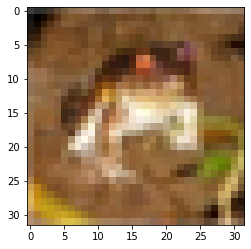

In [126]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

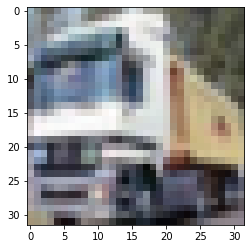

In [127]:
plt.imshow(X_train[1])

In [128]:
# 아무래도 32x32 픽셀의 저화질 사진이라서 육안으로는 알아보기 힘든 데이터이다.

In [129]:
# 이미지 데이터는 픽셀 채널마다 0~255 사이의 정수로 구성되어있다.
# 하지만, 신경망은 -1 ~ 1 사이의 값이 input으로 들어와야지 제일 잘 작동한다.

In [130]:
# 따라서 이미지 데이터의 픽셀 데이터를 0~255 범위 -> 0~1 범위로 바꿔주도록 하자.
# 정규화 하는 이유 : unnormalized 보다 normalized가 좀 더 쉽고, 빠르게 최적화 지점을 찾는다.
X_train = X_train.astype('float32') / 255.0  # 실수 범위로 바꾸기 위해  # astype : 데이터 타입 지정 (float32 실수형으로 변경)
X_test = X_test.astype('float32') / 255.0

# X의 범위가 0~255이므로 255로 나눠서
# 0~1의 범위로 바꿔준다.

In [131]:
print(X_train[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [132]:
# 각 픽셀에 해당하는 값이 0~1 사이의 소수들로 바뀐 것을 확인.

In [133]:
print(y_train[0])

[6]


In [134]:
print(y_train[1])

[9]


In [135]:
print(min(y_train), max(y_train))

[0] [9]


In [136]:
# label 값은 0~9로 one-hot encoding이 되지 않은 그냥 정수label 형태이다.
# 총 10개의 클래스를 가지고 있다.

In [137]:
# y에 해당하는 label값들이 현재는 정수 형태이므로
# one-hot encoding을 해주도록 하자.
NUM_CLASSES = 10  # label 클래스의 갯수 : 10개
y_train = to_categorical(y_train, NUM_CLASSES)  # to_categorical(클래스, 클래스의 갯수)
y_test = to_categorical(y_test, NUM_CLASSES)

In [138]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [139]:
# labeling이 one-hot encoding이 된 상태인 걸 확인.
# index가 6일 때의 값만 1이고 나머지는 0이므로
# 원래의 클래스값은 6이다.

# 클래스 범위 : 0 ~ 9

In [140]:
print(y_train.shape, y_test.shape)

(50000, 10) (10000, 10)


In [141]:
# one-hot encoding된 상태라서 shape의 2번째 값이 1 -> 10이 된 것을 확인.

In [142]:
print(X_train.shape)

(50000, 32, 32, 3)


In [143]:
# 1번재 차원 : 데이터셋의 이미지 index
# 2, 3번째 차원 : 이미지 높이(세로길이), 이미지 너비(가로길이)
# 4번째 차원 : 컬러 채널(3 -> RGB)

# 이 데이터셋에는 행이나 열이 없다. -> 4차원 텐서(tensor)이다!

# 54번째 훈련 데이터의 (12, 13)위치에 해당하는 픽셀의 G(초록색) 채널의 값을 찍어보자.
print(X_train[54, 12, 13, 1])

0.36862746


In [144]:
# 픽셀 채널값 : 0.0014455979인 것 확인.

keras의 신경망 구조
- Sequential 모델
  - 단순히 일렬로 층을 쌓은 네트워크를 빨리 만들 때 사용하기에 좋음.
  - 나눠지는 것(분기) 없이 이전 층이 그대로 다음층으로 연결.
- 함수형 API
  - 한 층의 출력이 여러 개의 층으로 전달
  - 여러 개의 출력이 하나의 층으로 전달되는 경우 사용
  - 단순히 층을 쌓는 것만으로는 구현할 수 없는 복잡한 인공 신경망을 구현할 수 있다.
  - 장기적으로 보면 모델이 점점 복잡한 구조가 될 수 있기 때문에 sequential 모델보다 함수형 API를 더 권장.
  - 함수형 API는 심층 신경망 구조를 설계하는 데 보다 자유로움.
- 두 가지 방법으로 정의 가능

# Sequential 모델을 사용한 네트워크

In [145]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential([
                    Dense(200, activation = "relu", input_shape=(32, 32, 3)),  # 1번째 층 - 뉴런의 갯수 : 200개, 활성화 함수 : ReLU, 입력 shape : 32x32 픽셀값을 갖는 3채널의 컬러 이미지
                    Flatten(),  # dense layer에 전달하기 위해서는 일자로 쭉 편 배열이 필요. flatten. 평탄화 작업 필요.
                    Dense(150, activation = "relu"),
                    Dense(10, activation = "softmax"),
])

# 함수형 API를 사용한 네트워크
- 각 층을 함수로서 정의한다.(function)
- 각 함수를 조합하기 위한 연산자를 이용하여 신경망을 설계.


In [146]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model

## 입력층
input_layer = Input(shape=(32, 32, 3))  # shape가 (None, 32, 32, 3)인 tensor를 만든다.
# tensor? 다차원 numpy 배열 객체

## 은닉층
x = Flatten()(input_layer)
x = Dense(units=200, activation="relu")(x)
x = Dense(units=150, activation="relu")(x)

## 출력층
output_layer = Dense(units=10, activation="softmax")(x)
# 출력층에서는 활성화함수로 softmax를 사용한다.
# softmax -> 각 클래스에 속할 확률을 출력한다.
# 각 확률들을 다 합하면 1이 된다.

model = Model(input_layer, output_layer)

3종류의 층 사용 : Input, Flatten, Dense
- Input 층
  - 네트워크의 시작점
  - 네트워크가 기대하는 입력 데이터의 크기를 튜플로 알려준다.
  - 배치 크기 지정하지 X ; 임의의 이미지 갯수를 전달할 수 있기 때문에
- Flatten 층
  - 입력을 하나의 벡터로 펼친다
  - 벡터의 길이 : 32x32x3 = 3072 가 된다.
  - Flatten층이 필요한 이유? 뒤에 오는 Dense 층이 다차원 배열이 아닌 평평한 입력을 기대하기 때문이다.
  - +) Dense층이 아닌 다른 종류의 층은 입력으로 다차원 배열을 사용.
  - Flatten 층을 언제 사용하는 지 알려면? 층마다 필요한 입력, 출력의 크기를 알아야 한다.
- Dense 층
  - 신경망의 기본 층
  - fully connected 된다.
  - 즉, Dense 층의 각 유닛(unit, 뉴런)들은 이전 층의 모든 뉴런과 연결되어 있다.
  - 유닛의 출력 : wx+b
  - 활성화 함수 : 비선형 함수 사용 -> 다음 층으로 전달

활성화 함수
- ReLU
  - 심층 신경망의 층을 안정적으로 훈련할 수 있는 가장 믿을만한 활성화 함수
- sigmoid
  - 출력값을 0~1 사이로 조정하고 싶을 때 유용
  - ex) 이진 분류 문제, 다중 레이블 분류 문제에 사용
- softmax
  - 전체 출력 합 = 1
  - ex) 다중 분류 문제에 사용


다중 레이블 분류 vs 다중 분류?
- 다중 레이블 분류 : 1개 이상의 클래스에 속한다. 즉, 여러개의 클래스에 속할수도 있다.
- 다중 분류 : 무조건 1개의 클래스에만 속해야만 한다.

Model클래스 -> 모델 정의
- keras에서는 모델을 입력층, 출력층으로 정의

입력층의 사이즈 = X_train의 사이즈

출력층의 사이즈 = y_train의 사이즈

In [147]:
model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 200)               614600    
_________________________________________________________________
dense_18 (Dense)             (None, 150)               30150     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [148]:
# 각 층에서 만드는 출력의 크기, 사용하는 parameter의 갯수를 볼 수 있다.

# 첫번째 입력층(Input 층)에서의 Output Shape를 보았을 때
# 1번째 차원의 값이 None이다.
# 이 말은, 아직 네트워크에 전달될 샘플의 갯수를 모른다는 것을 표시하는 것이다.

# 실제로도 샘플의 갯수를 지정할 필요 X

# 데이터가 들어가게 되면 알아서 지정된다.

# tensor 계산은 선형 대수를 사용하여 동시에 모든 샘플에 수행된다.
# 이러한 백엔드 계산은 tensorflow가 알아서 해준다.

# GPU 사용하는 이유도 이러한 많은 텐서 곱셈에 대해 최적화되어 있기 때문이다.

# +) 추가적으로 모델이 너무 느리게 훈련이 된다? -> summary 메서드를 이용하여 너무 많은 가중치가 있는 층을 확인
# -> 해당 층의 유닛(뉴런)의 갯수를 줄인다.

In [149]:
# 모델 컴파일
# model, loss function, optimizer를 연결

from keras.optimizers import Adam

opmz = Adam(lr=0.0005)
model.compile(loss="categorical_crossentropy", optimizer=opmz, metrics=['accuracy'])

손실 함수(loss function)
- 신경망이 예측 출력, 정답을 비교하는 데 사용됨
- 손실 함수(loss function)이 크다 -> 네트워크의 수행 결과가 좋지 않다.
- 평균제곱오차(mse; mean squared error)
  - ex) 회귀 문제
- 범주형 크로스 엔트로피(categorical cross-entropy)
  - ex) 다중 분류 문제(여러 개의 클래스 중 단 하나의 클래스에 속할 수 있음)
- 이진 크로스 엔트로피(binary cross-entropy)
  - ex) 이진 분류 문제, 다중 레이블 분류 문제(여러 개의 클래스에 속할 수 있을 때)
- keras는 사용자 정의 손실 함수 정의 가능.

옵티마이저(optimizer)
- 손실 함수의 gradient를 기반으로 신경망의 가중치를 업데이트하기 위해 사용하는 **알고리즘**
- Adam
  - 가장 널리 사용, 안정적임
  - 대부분의 경우, lr(learning rate, 학습률)을 제외하고는 Adam 옵티마이저의 기본 매개변수를 바꿀 필요가 없다.
  - 학습률이 클수록 -> 1번의 훈련 step에서 가중치를 크게 바꾼다. -> 초기에 훈련 속도가 빠르지만 훈련이 조금 불안정, 손실 함수의 최솟값을 지나쳐서 찾지 못할 수도 있다.
  - 학습률이 너무 작으면 -> 훈련 step마다 가중치를 조금만 바꾼다. -> 학습 시간이 너무 오래 걸린다.
  - 매개변수 lr은 훈련 과정에서 튜닝, 조정 필요!
- RMSProp
  - 대부분의 경우, RMSProp의 옵티마이저의 매개변수도 조정할 필요가 없다.

- 참조 : https://keras.io/api/optimizers/

# 모델 훈련

In [150]:
# 아직까지 모델에 어떠한 데이터도 전달하지 X
# 지금까지 한 과정은 네트워크의 구조 정의, 모델에 손실 함수, 옵티마이저 연결.

# 이제 모델에 데이터를 넣어 모델 훈련을 해보자.
model.fit(X_train, y_train,  # 훈련 데이터, one-hot encoding된 훈련 데이터의 label
          batch_size = 32,  # 훈련 step 1번당 전달되는 샘플 갯수
                            # iteration : 1번의 학습당 몇 회의 훈련 step이 발생하는지.
                                    # ex) 전체 데이터 : 50000개, batch_size=500 -> iteration=100
                                    # iteration 횟수만큼(이땐 100회) 돌아야지 1 epoch 가 된 것. 1 epoch가 전체 데이터셋을 1번 훈련시킨 것이니까.
          epochs = 10,  # 전체 데이터셋을 몇 번 훈련할 것인지
                        # epoch 값이 작다 -> 과소적합의 위험 존재
                        # epoch 값이 크다 -> 과대적합의 위험 존재
          shuffle = True)  # 훈련 step마다 배치 데이터를 훈련 데이터에서 중복X, 랜덤하게 추출
                                    # 훈련 step : 미니 배치 데이터가 네트워크에 입력되는 과정 ~ 가중치가 업데이트 되기까지의 과정

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8498 - accuracy: 0.3321
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6739 - accuracy: 0.4023
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5989 - accuracy: 0.4304
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5415 - accuracy: 0.4490
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5028 - accuracy: 0.4640
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4726 - accuracy: 0.4736
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4417 - accuracy: 0.4879
Epoch 8/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4160 - accuracy: 0.4953
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4011 - accuracy: 0.5003
Epoch 10/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.382

batch_size는 일반적으로 32, 64의 크기가 성능이 가장 좋다고 알려져있다.

batch_size 감소시킬 때
- 필요한 메모리 감소
- 전체 데이터를 쪼개서 여러번 학습. 최소 요구 메모리양 줄일 수 있음

batch_size 증가시킬 때의
- 학습이 안정됨
- 일반화 성능은 감소
  - 일반화 성능? 훈련 데이터가 아닌 테스트 데이터를 모델에 대입했을 때 나오는 성능. 훈련 데이터뿐만 아니라 테스트 데이터에도 성능이 좋아야지 일반화 성능이 좋다고 말한다.

즉, 가용 메모리가 적을 경우 -> batch_size를 작게

안정적인 학습을 시키고 싶을 경우 -> batch_size를 크게하면 된다.

훈련 과정
1. 가중치 : 랜덤값으로 초기화
2. 훈련 step 반복 -> 손실함수를 최소화하기위한 가중치 업데이트
3. 1 epoch 완료
4. 2번째 epoch을 위해 데이터가 배치로 다시 나뉘어 네트워크에 전달
5. 지정한 횟수만큼의 epoch 반복


In [151]:
# 위의 훈련의 결과를 보면 loss값 : 1.3643
# 정확도 : 51.70%이다.

# 성능이 그리 좋아보이지는 않는다.

In [152]:
# 훈련 데이터에 대한 정확도가 51.70%인데
# 테스트 데이터에 대한 정확도는 얼마가 나올지 확인해보자.

model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4755 - accuracy: 0.4793


[1.4754976034164429, 0.47929999232292175]

In [153]:
# 출력값 : [범주형 cross entropy loss값, 정확도]
# loss 값 : 1.4237
# 정확도 : 49.63%가 나왔다.

# 본적 없는 새 데이터. 테스트 데이터에 대한 정확도가 49.63%로,
# 원래 훈련 시킨 훈련 데이터의 정확도와 2% 정도로 큰 차이가 있어보이지는 않는다.

# 만약 지금과 같이 훈련 데이터를 이용하여 모델을 훈련시킨 후 예측을 하지 않고
# 일반적인 확률로 예측을 했다면, 클래스의 갯수가 총 10개이므로 정확도가 10%가 나왔을 것이다.

In [154]:
# predict 메소드를 이용하여
# 테스트 세트에 대한 예측 결과를 확인해보자.

In [155]:
import numpy as np
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(X_test)
print(preds)
print(preds.shape)  # 훈련 데이터 10000개, 클래스 10개에 해당하는 확률이 출력됨

[[4.8066959e-02 1.3908763e-01 2.9105291e-02 ... 3.5985215e-03
  3.9646663e-02 2.1789594e-02]
 [3.3005640e-02 3.1844401e-01 2.8601659e-03 ... 5.1885704e-04
  3.2540128e-01 3.1709582e-01]
 [1.3289726e-01 2.5935119e-01 2.5300330e-03 ... 6.5537626e-03
  4.6302733e-01 1.2771940e-01]
 ...
 [2.1761195e-03 6.9005013e-04 1.4065701e-01 ... 8.6457305e-02
  7.9181893e-03 1.6871946e-03]
 [9.3680006e-03 3.7881806e-02 6.5445937e-02 ... 3.8811062e-02
  4.7213059e-02 6.7092702e-03]
 [1.0799996e-02 2.2035476e-03 3.9171744e-02 ... 8.7009460e-01
  7.4151467e-04 1.1739522e-03]]
(10000, 10)


In [156]:
# 각각의 클래스가 될 확률들로 출력되므로
# 확률이 제일 큰 클래스로 예측을 한 것으로 판단한다.

print(np.argmax(preds, axis=1))
# axis=1
# numpy 배열 안에 데이터가 쌓이는 방향이 세로 방향
# 그 다음 클래스에 해당하는 각 확률이 쌓이는 방향이 가로 방향이므로
# 내가 원하는 기준은 각 클래스에 해당하는 확률이 최댓값이 되는 index를 구하는 것이므로
# axis=1을 기준으로 한다.

[3 8 8 ... 3 4 7]


In [157]:
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

In [158]:
print(preds_single)
print(actual_single)

['cat' 'ship' 'ship' ... 'cat' 'deer' 'horse']
['cat' 'ship' 'ship' ... 'dog' 'automobile' 'horse']


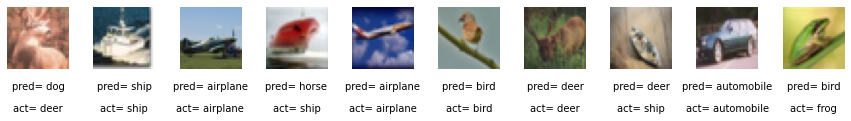

In [159]:
# 실제 그림, 모델을 통해 구한 예측값, 실제 label 을 나란히 놓고 비교해보자.

import matplotlib.pyplot as plt
indices = np.random.choice(range(len(X_test)), 10)  # X_test. 테스트 데이터 중에서 10개만 랜덤하게 뽑은 후 예측 label, 실제 label을 비교해보자.

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
  img = X_test[idx]
  ax = fig.add_subplot(1, 10, i+1)  # add_subplot(행, 열, 몇번째) : ~행 ~열의 몇번째 subplot에 그릴 것인지 설정
  ax.axis("off")
  ax.text(0.5, -0.35, "pred= " + str(preds_single[idx]), fontsize=10, ha="center", transform=ax.transAxes)
  ax.text(0.5, -0.7, "act= " + str(actual_single[idx]), fontsize=10, ha="center", transform=ax.transAxes)
  ax.imshow(img)

In [160]:
# 정확도가 49.63%가 나왔었는 데 3개만 맡고 7개가 틀리게 나왔다.
# 랜덤하게 뽑은 거라서 확실히 결과도 랜덤하게 보이는 것으로 확인.

In [161]:
# 지금은 지도 학습 문제를 풀었다.
# 다음 장 부터는 생성 모델을 만들 때 비지도 학습도 사용한다.

하지만, 지금 모델의 정확도는 대략 50%정도로 절반밖에 맞추지 못한다.

딥러닝을 사용한 모델치고 정확도가 낮은 편인데 그 이유가 무엇일까?

이유? 입력 이미지의 공간 구조를 다룰 수 잇는 요소가 네트워크에 없기 때문이다.

1번째 Dense 층에 전달하기 위해서 입력 이미지를 1줄짜리 벡터로 펼치는 평탄화 flatten 작업을 했었다. -> 한 줄로 펼쳐지면 어떻게 생긴 이미지인지 구별이 잘 되지 않는다. 또한, 이미지의 공간적인 구조도 반영이 되지 않는다.

이러한 문제를 해결하기 위해서는 합성곱 층(convolution layer)를 이용해야 한다.

# 합성곱 층(convolution layer)

필터 (=커널)
- filters 매개변수 : 필터의 갯수
- kernel_size : 합성곱 윈도우의 크기

합성곱 : 필터를 이미지의 일부분과 픽셀끼리 곱한 후 결과를 더하는 것이다.
- 행렬의 곱 X, 같은 위치끼리 곱을 한 후 다 합친 것.
- <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FVNVPq%2FbtqxWLwmzeg%2FC1tpPAyekF6gpGbcqWOrV1%2Fimg.gif" width="400">
- 이미지 영역이 필터와 비슷할수록 큰 수 출력
- 필터와 반대일수록 작은 수 출력
- 이러한 합성곱을 통해 입력 이미지에서 어떠한 특성을 골라낸 새로운 배열을 얻을 수 있다.
- 보통 1개의 필터보다는 여러 개의 필터를 사용한다.

컬러 이미지 -> 3채널(RGB)

그러므로 각각의 필터(= 커널)마다 3개의 채널을 가진다.

In [162]:
input_layer = Input(shape=(64, 64, 1))

from keras.layers.convolutional import Conv2D
conv_layer_1 = Conv2D(filters = 2,  # 필터의 갯수
                      kernel_size = (3, 3),  # 필터의 모양. 크기
                      strides = 1,  # 필터 윈도우가 오른쪽, 아래쪽으로 몇 칸씩 이동할 것인지
                      padding = "same")(input_layer)  # padding="same" : 입력 데이터를 0으로 패딩

stride
- 필터가 1번에 입력 이미지 위를 이동하는 칸 수
- stride가 크다 -> 출력 tensor의 사이즈가 작다.
- 네트워크를 통과하면서 채널의 수는 늘리고, 텐서의 공간 방향 크기를 줄이는 데 사용 가능

padding
- `padding="same"` : 입력 데이터를 0으로 패딩
- -> 입력 크기 = 출력 크기
- 패딩이 없다면 필터의 stride 때문에 출력 크기가 입력 크기보다 작아진다.
- `padding="same"` 으로 지정하면 여러 개의 합성곱 층을 통과할 때 tensor의 크기를 쉽게 파악 가능하다.

필터에 저장된 값 : 학습된 가중치
- 처음에는 랜덤하게 초기화되지만
- 점점 필터가 특성을 감지할 수 있도록 가중치를 조정한다.

In [163]:
input_layer = Input(shape=(32, 32, 3))

conv_layer_1 = Conv2D(filters=10,
                      kernel_size=(4, 4),
                      strides=2,
                      padding="same")(input_layer)
conv_layer_2 = Conv2D(filters=20,
                      kernel_size=(3, 3),
                      strides=2,
                      padding="same")(conv_layer_1)
flatten_layer = Flatten()(conv_layer_2)
output_layer = Dense(units=10,
                     activation="softmax")(flatten_layer)
model = Model(input_layer, output_layer)

In [164]:
# 이미지는 아직 넣지 않았다.
# 그래서 이미지의 갯수는 알 수 없고, 32x32 사이즈를 사용한다. 
# 컬러 이미지 -> 3 채널 사용

# 중요한 것! input shape의 채널 수 = 첫번째 convolution layer의 채널 수!!
# conv_layer_1을 통과한 결과물의 shape : (16, 16, 10)  # 마지막 채널 수 : conv_layer_1 레이어의 필터의 갯수!
# shape의 높이, 너비의 크기 -> convolution layer의 strides 파라미터에 영향을 받는다.
# kernel_size에는 영향을 받지 X!!
# padding="same" -> 주변을 0으로 채운다.

# 2번째 convolution layer인 conv_layer_2를 통과한 결과물의 shape : (8, 8, 20)

# 이렇게 convolution layer 2개를 통과한 다음
# 마지막으로 dense layer에 넣기 위해
# 평탄화 작업. flatten 작업을 했다.

# 이유?
# dense layer는 fully-connected layer로 벡터를 입력값으로 받기 때문에
# 다차원 배열이 들어온다면 평탄화 작업이 반드시 필요하다!

# 평탄화 작업을 해준 결과물의 shape : (1280, 1)  # 8x8x20=1280

# 마지막 출력층 dense layer에서
# 활성화 함수 softmax를 사용하여
# 각 클래스(총 10개의 클래스)에 속하는 확률을 각각 출력해준다.
# 최종 출력값의 출력 shape : (10, 1)

# keras의 함수형 API는 Model 안에 입력층, 출력층을 대입한다!

In [165]:
# 위에서 각 컨볼루션 레이어를 통과한 결과물들의 shape를 추측해봤으니 실제로도 맞을 지 확인해볼겸
# model의 요약 정보를 출력해보자.

model.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten_8 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [166]:
# 내가 생각한 형태대로 나온 것을 확인할 수 있다.

# parameter의 갯수도 같이 고려해보자면
# conv2d_1 레이어에 해당되는 필터의 갯수 : 10개
# 각 필터당 사이즈 4x4=16
# 각 필터의 채널 : 3개
# 즉, 한 필터의 파라미터 -> 4x4x3 = 48
# 현향은 필터 1개당 1개씩 추가

# 즉, 한 필터의 총 파라미터의 갯수 : 48+1=49개

# 총 필터의 갯수 : 10개
# conv2d_1의 총 파라미터의 갯수 : 49x10=490개

# 이런식으로 parameter의 갯수를 셀 수 있다.

In [167]:
# keras의 모델의 첫 번째 차원의 None : 한꺼번의 임의의 갯수의 이미지를 네트워크로 통과시킬 수 있다.
# 즉, 몇개던지 이미지 다 통과가능하다.

In [168]:
# 제일 중요한 개념 ! : 필터의 채널(깊이) = 이전 층의 채널 수

# 추가적으로 fully-connected layer과 정확도 성능을 비교하기 전에
# 성능 향상을 위해 BatchNormalization, Dropout 층을 이용해보자.

배치 정규화 층
- 심층 신경망을 훈련할 때 중요한 것은 네트워크의 가중치를 일정한 범위 안에서 유지해야 한다는 것이다.
- 값이 커지기 시작하면 gradient exploding 문제가 발생했다는 것이다.
- 오차가 역전파를 통해 거꾸로 전파되면서 앞 층의 gradient 계산이 기하급수적으로 증가할 수 있다. -> 그러면 가중치 값이 큰 폭에서 변화한다.
- +) loss 함수가 NaN을 반환하기 시작하면 가중치가 overflow 에러를 발생시킬만큼 커졌다는 것이다.

